In [1]:
# SVM Simple - IRIS DATASET

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
%matplotlib inline
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [21]:
type(iris)


sklearn.utils.Bunch

In [23]:
# conevrt to Data Frame - View Data
import pandas as pd
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [35]:
# https://stackoverflow.com/questions/38105539/how-to-convert-a-scikit-learn-dataset-to-a-pandas-dataset
df['species_target'] = pd.Series(iris.target)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
# Get Frequency / Counter of Category

from collections import Counter
Counter(df['species_target'])


Counter({0: 50, 1: 50, 2: 50})

In [41]:
#df.head(5)
df.iloc[45:55,]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_target
45,4.8,3.0,1.4,0.3,0
46,5.1,3.8,1.6,0.2,0
47,4.6,3.2,1.4,0.2,0
48,5.3,3.7,1.5,0.2,0
49,5.0,3.3,1.4,0.2,0
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [13]:
# Code from Python SKLEARN, I just converted to Function
def plotSVC(title):
  # create a mesh to plot in
  x_min, x_max = X[:, 0].min()-1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),

  np.arange(y_min, y_max, h))

  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  # with and without Contour
  # Contour - check with RBF and Gamma
  plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title(title)

  plt.show()

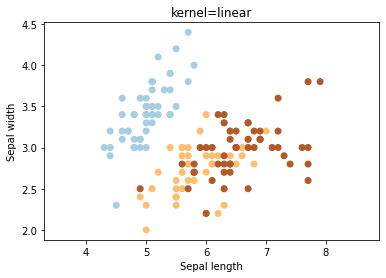

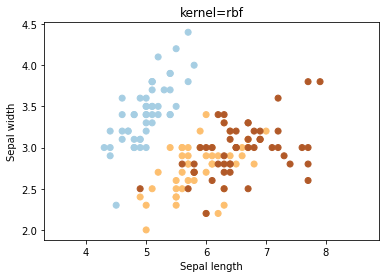

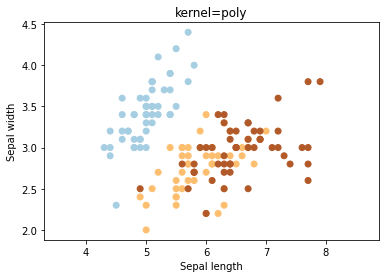

In [8]:
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
  svc = svm.SVC(kernel=kernel).fit(X, y)
  plotSVC('kernel=' + str(kernel))

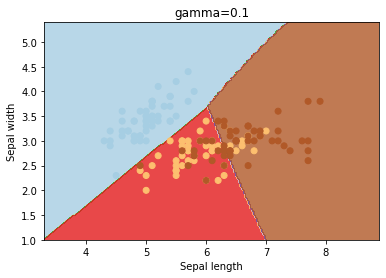

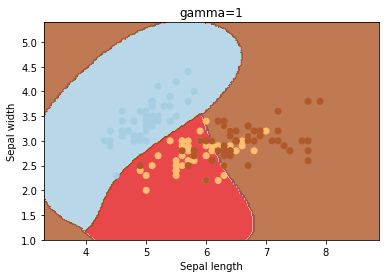

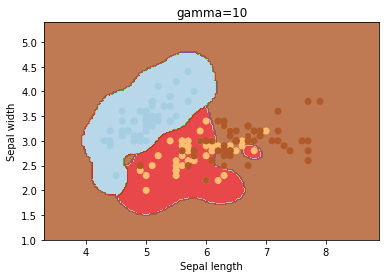

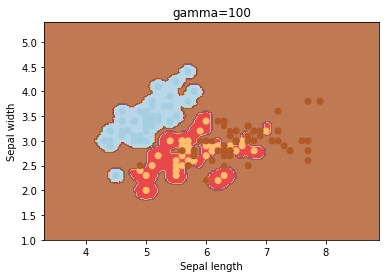

In [12]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
   svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X, y)
   plotSVC('gamma=' + str(gamma))

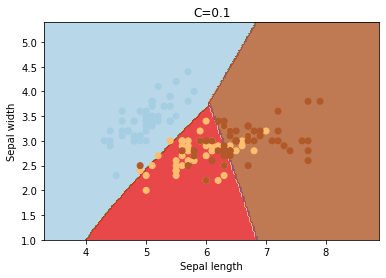

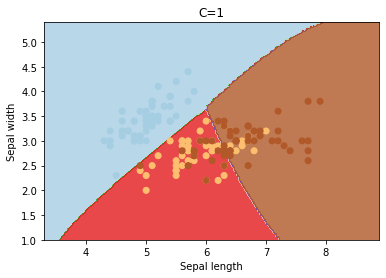

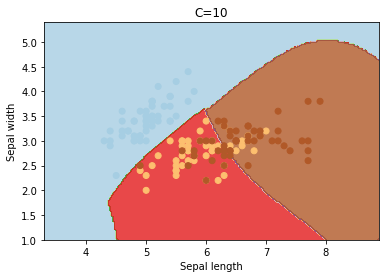

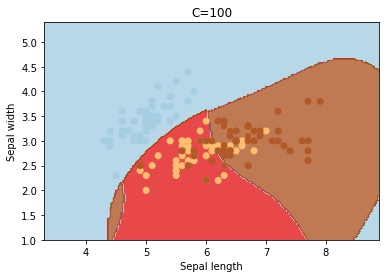

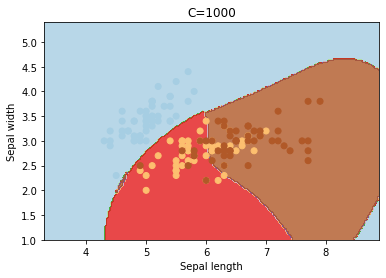

In [14]:
cs = [0.1, 1, 10, 100, 1000]
for c in cs:
   svc = svm.SVC(kernel='rbf', C=c).fit(X, y)
   plotSVC('C=' + str(c))

In [ ]:
#